# Starbucks Twitter Sentiment Analysis

In [1]:
# Import Libraries
import json
import pymongo
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from tweepy import OAuthHandler
from pymongo import MongoClient

In [2]:
# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials
consumer_key = "xhsSu7y92oAFi9U3yX794Chav"
consumer_secret = "0YWxdhZ2XvBs6Tk33iolwIYSdcuZL23CmhRK1TeHV6bIMdQ7SM"
access_token = "324351622-rO9AGKtQ8WvWBQrX8bnWlEvXcJ3FgKpR3tPLB7fW"
access_token_secret = "8OAe9FSFELuvIRHccwOgncxAgxIPgGvp19JDe44IeYOuV"

# Use the above credentials to authenticate the API.
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [105]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

data_csv = pd.DataFrame(columns=["user_id","date","user","screen_name","is_verified","tweet","likes","re_tweet","location","language","followers_count","friends_count","listed_count","statuses_count","favourites_count"])
print(data_csv)

Empty DataFrame
Columns: [user_id, date, user, screen_name, is_verified, tweet, likes, re_tweet, location, language, followers_count, friends_count, listed_count, statuses_count, favourites_count]
Index: []


In [106]:
# We will use api as api.search inside this tweepy cursor.
# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc

def get_tweets(topic,count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=topic,count=100000, lang="en",exclude='retweets').items():
        print(i, end='\r')
        data_csv.loc[i,"user_id"] = tweet.user.id
        data_csv.loc[i,"date"] = tweet.created_at
        data_csv.loc[i,"user"] = tweet.user.name
        data_csv.loc[i,"screen_name"] = tweet.user.screen_name
        data_csv.loc[i,"is_verified"] = tweet.user.verified
        data_csv.loc[i,"tweet"] = tweet.text
        data_csv.loc[i,"likes"] = tweet.favorite_count
        data_csv.loc[i,"re_tweet"] = tweet.retweet_count
        data_csv.loc[i,"location"] = tweet.user.location        
        data_csv.loc[i,"language"] = tweet.lang
        data_csv.loc[i,"followers_count"] = tweet.user.followers_count
        data_csv.loc[i,"friends_count"] = tweet.user.friends_count
        data_csv.loc[i,"listed_count"] = tweet.user.listed_count
        data_csv.loc[i,"statuses_count"] = tweet.user.statuses_count
        data_csv.loc[i,"favourites_count"] = tweet.user.favourites_count
        
        i=i+1
        if i>count:
            break
        else:
            pass

In [107]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
topic=["Starbucks","#starbucks"]
get_tweets(topic ,count=100)

In [109]:
data_csv.drop_duplicates(subset ="user_id",keep = False, inplace = True)

In [111]:
data_csv.to_csv('{}.csv'.format("Twitter-Data"),index=False)

In [1]:
# Importing Dataset to MongoDB
db = MongoClient("mongodb://localhost:27017/")
database = db["twitter_database"] # collection instance

def csv_to_json(filename, header=None):
    data = pd.read_csv(filename, header=header)
    return data.to_dict('records')
db.twitter_database.tweeter_data_test.insert_many(csv_to_json('TweetDataset_1.csv', header=0))

print("Your CSV file Imported Successfully")

NameError: name 'MongoClient' is not defined

In [82]:
# Exporting Data from MongoDB
# Importing Dataset to MongoDB
db = MongoClient("mongodb://localhost:27017/")
database = db["twitter_database"] # collection instance
collection = database["tweeter_data"]
twitter_data = collection.find()

df_twitter = pd.DataFrame(list(twitter_data))

df_twitter = df_twitter[["user_id","date","user","screen_name","is_verified","tweet","likes","re_tweet","location","language","followers_count","friends_count","listed_count","statuses_count","favourites_count"]]

In [3]:
df_twitter.isnull().sum()

user_id                 0
date                    0
user                    4
screen_name             0
is_verified             0
tweet                   0
likes                   0
re_tweet                0
location            33538
language                0
followers_count         0
friends_count           0
listed_count            0
statuses_count          0
favourites_count        0
dtype: int64

In [4]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115250 entries, 0 to 115249
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           115250 non-null  float64
 1   date              115250 non-null  object 
 2   user              115246 non-null  object 
 3   screen_name       115250 non-null  object 
 4   is_verified       115250 non-null  bool   
 5   tweet             115250 non-null  object 
 6   likes             115250 non-null  int64  
 7   re_tweet          115250 non-null  int64  
 8   location          81712 non-null   object 
 9   language          115250 non-null  object 
 10  followers_count   115250 non-null  int64  
 11  friends_count     115250 non-null  int64  
 12  listed_count      115250 non-null  int64  
 13  statuses_count    115250 non-null  int64  
 14  favourites_count  115250 non-null  int64  
dtypes: bool(1), float64(1), int64(7), object(6)
memory usage: 12.4+ MB


In [5]:
df_twitter_clean = df_twitter.dropna()

In [6]:
df_twitter_clean.isnull().sum()

user_id             0
date                0
user                0
screen_name         0
is_verified         0
tweet               0
likes               0
re_tweet            0
location            0
language            0
followers_count     0
friends_count       0
listed_count        0
statuses_count      0
favourites_count    0
dtype: int64

In [7]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81710 entries, 0 to 115249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           81710 non-null  float64
 1   date              81710 non-null  object 
 2   user              81710 non-null  object 
 3   screen_name       81710 non-null  object 
 4   is_verified       81710 non-null  bool   
 5   tweet             81710 non-null  object 
 6   likes             81710 non-null  int64  
 7   re_tweet          81710 non-null  int64  
 8   location          81710 non-null  object 
 9   language          81710 non-null  object 
 10  followers_count   81710 non-null  int64  
 11  friends_count     81710 non-null  int64  
 12  listed_count      81710 non-null  int64  
 13  statuses_count    81710 non-null  int64  
 14  favourites_count  81710 non-null  int64  
dtypes: bool(1), float64(1), int64(7), object(6)
memory usage: 9.4+ MB


In [ ]:
for loc in df_twitter_clean.location:
    print(loc)

In [8]:
countries = ["UK","USA","New York"]
location_df = pd.DataFrame()
for i in countries:
#     print(i)
    filter_loc = pd.DataFrame(df_twitter_clean.loc[df_twitter_clean['location'] == i])
    location_df = location_df.append(filter_loc)
# print("-----------------------------------------------------------------------------")
# print("After Loop Filter on Countries -", location_df.shape[0])
# print("-----------------------------------------------------------------------------")
# print("New - USA",location_df.loc[location_df['location'] == 'USA'].shape[0])
# print("-----------------------------------------------------------------------------")
# print("New - UK",location_df.loc[location_df['location'] == 'UK'].shape[0])
# print("-----------------------------------------------------------------------------")
# print("New - New York",location_df.loc[location_df['location'] == 'New York'].shape[0])
# print("-----------------------------------------------------------------------------")

In [9]:
# Reset our index so datetime_utc becomes a column
# disable chained assignments
pd.options.mode.chained_assignment = None 

location_df.reset_index(inplace=True)
location_df['date'] = pd.to_datetime(location_df['date'], errors='coerce')
# Create new columns
location_df['day'] = location_df['date'].dt.day
# print(location_df['day'])
# print("-----------------------------------------------------------------------------")

location_df['month'] = location_df['date'].dt.month
# print(location_df['month'])
# print("-----------------------------------------------------------------------------")

location_df['year'] = location_df['date'].dt.year
# print(location_df['year'])
# print("-----------------------------------------------------------------------------")

location_df['time'] = pd.to_datetime(location_df['date'], format='%Y:%M:%D').dt.time
# print(location_df['time'])
# print("-----------------------------------------------------------------------------")

# print(location_df.head(5))

In [ ]:
df_twitter_dataset_cleaned.loc[df_twitter_dataset_cleaned['location'] == 'New York']

In [10]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [11]:
# Funciton to analyze Sentiment

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [17]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [13]:
location_df['clean_tweet'] = location_df['tweet'].apply(lambda x : clean_tweet(x))
print(location_df.head(5))

   index       user_id                date                 user  \
0    893  8.621937e+08 2021-09-04 15:26:00                  MoW   
1   1758  2.816682e+09 2021-09-04 14:03:00  Mirror Money Saving   
2   2134  1.679018e+08 2021-09-04 13:22:00   Francesca Bradford   
3   2489  9.873580e+17 2021-09-04 12:35:00               Beagle   
4   3100  1.688718e+07 2021-09-04 10:22:00           The Mirror   

     screen_name  is_verified  \
0   Mormegil_AMW        False   
1    MirrorMoney         True   
2       cesca_uk        False   
3  BeagleInALoop        False   
4    DailyMirror         True   

                                               tweet  likes  re_tweet  \
0  @NaressiaR @massgeneric @justinbaragona I thin...      0         0   
1  Starbucks unveils new bubblegum-flavoured Frap...      7         3   
2  @GracelessHippo I balanced a mocha from Starbu...      2         0   
3  @roderickgraham Let me know when the badly fit...      0         0   
4  Gordon Ramsay winds up Starbuc

In [14]:
# Call function to get the Sentiments
location_df["sentiment"] = location_df["tweet"].apply(lambda x : analyze_sentiment(x))
print(location_df.head(5))

   index       user_id                date                 user  \
0    893  8.621937e+08 2021-09-04 15:26:00                  MoW   
1   1758  2.816682e+09 2021-09-04 14:03:00  Mirror Money Saving   
2   2134  1.679018e+08 2021-09-04 13:22:00   Francesca Bradford   
3   2489  9.873580e+17 2021-09-04 12:35:00               Beagle   
4   3100  1.688718e+07 2021-09-04 10:22:00           The Mirror   

     screen_name  is_verified  \
0   Mormegil_AMW        False   
1    MirrorMoney         True   
2       cesca_uk        False   
3  BeagleInALoop        False   
4    DailyMirror         True   

                                               tweet  likes  re_tweet  \
0  @NaressiaR @massgeneric @justinbaragona I thin...      0         0   
1  Starbucks unveils new bubblegum-flavoured Frap...      7         3   
2  @GracelessHippo I balanced a mocha from Starbu...      2         0   
3  @roderickgraham Let me know when the badly fit...      0         0   
4  Gordon Ramsay winds up Starbuc

In [15]:
# Check Summary of Random Record
n = 112
print("Original tweet:\n",location_df['tweet'][n])
print()
print("Clean tweet:\n",location_df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",location_df['sentiment'][n])

Original tweet:
 Starbucks time!
Kigu edition~ https://t.co/d0Kdm0bIqC

Clean tweet:
 starbucks time kigu edition

Sentiment of the tweet:
 Neutral


In [19]:
# Overall Summary

# print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(location_df.tweet)))
print("Total Positive Tweets are : {}".format(len(location_df[location_df["sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(location_df[location_df["sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(location_df[location_df["sentiment"]=="Neutral"])))

Total Positive Tweets are : 232
Total Negative Tweets are : 116
Total Neutral Tweets are : 302


In [20]:
location_df["sentiment"].value_counts()

Neutral     302
Positive    232
Negative    116
Name: sentiment, dtype: int64

C:\Users\Shubham\anaconda3\envs\starbucks-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

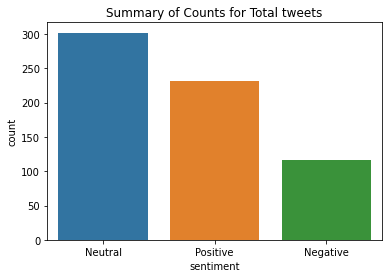

In [21]:
#sns.countplot(df["Sentiment"],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
sns.countplot(location_df["sentiment"])
plt.title("Summary of Counts for Total tweets")

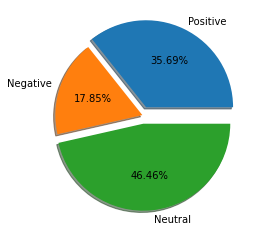

In [22]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(location_df[location_df["sentiment"]=="Positive"])
b=len(location_df[location_df["sentiment"]=="Negative"])
c=len(location_df[location_df["sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

C:\Users\Shubham\anaconda3\envs\starbucks-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

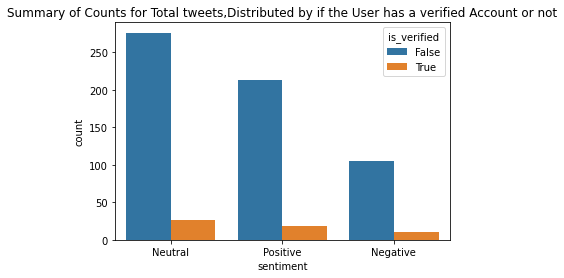

In [23]:
sns.countplot(location_df["sentiment"],hue=location_df.is_verified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Start with one review:

text = location_df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in location_df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

In [ ]:
text_positive = " ".join(review for review in location_df[location_df["sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

In [ ]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in location_df[location_df["sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

In [25]:
!pip install scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [1]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(location_df.clean_tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
print(frequency)

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

NameError: name 'location_df' is not defined

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

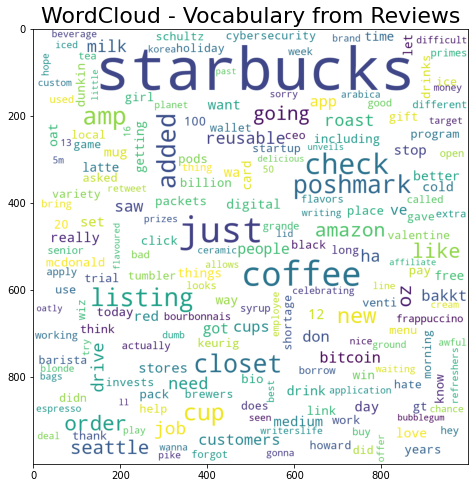

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [28]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [29]:
# extracting hashtags from tweets
HT_regular = hashtag_extract(location_df['tweet'])
HT_regular = sum(HT_regular,[])

In [31]:
!pip install nltk

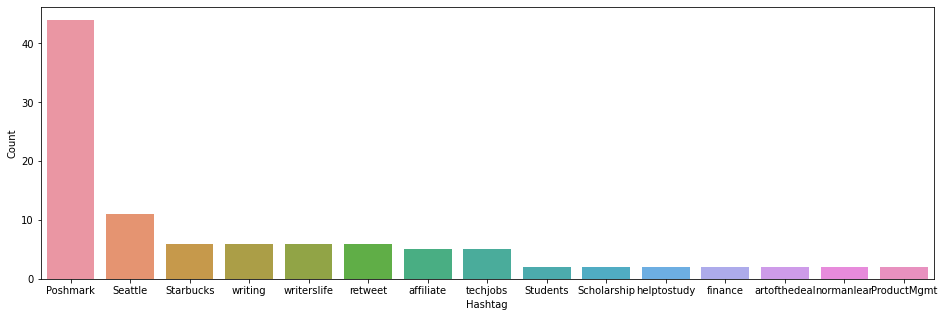

In [34]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [49]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             650 non-null    int64         
 1   user_id           650 non-null    float64       
 2   date              650 non-null    datetime64[ns]
 3   user              650 non-null    object        
 4   screen_name       650 non-null    object        
 5   is_verified       650 non-null    bool          
 6   tweet             650 non-null    object        
 7   likes             650 non-null    int64         
 8   re_tweet          650 non-null    int64         
 9   location          650 non-null    object        
 10  language          650 non-null    object        
 11  followers_count   650 non-null    int64         
 12  friends_count     650 non-null    int64         
 13  listed_count      650 non-null    int64         
 14  statuses_count    650 non-

C:\Users\Shubham\anaconda3\envs\starbucks-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Verified')

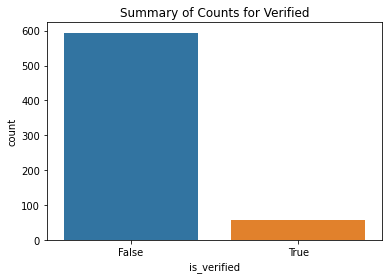

In [36]:
sns.countplot(location_df["is_verified"])
plt.title("Summary of Counts for Verified")

In [37]:
!pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=eeeefeb79b6c11b756433f255483e32426d833c799be2d390afd214b14f90e10
  Stored in directory: c:\users\shubham\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [50]:
import plotly.express as px
fig = px.bar(location_df, x='sentiment', color='sentiment')
fig.show()